In [7]:
import earthaccess
import xarray as xr
import tenacity
import dask

In [8]:
auth = earthaccess.login(strategy='interactive', persist = True)

In [ ]:
# rewrap function to deal with NASA earthaccess download time error

always_retry = tenacity.retry(wait=tenacity.wait_random_exponential(multiplier=1, max=60))
tenaciously_download_file = always_retry(earthaccess.__store__._download_file)
earthaccess.__store__._download_file = tenaciously_download_file

In [ ]:
# search for results (testing with just a couple days)

results = earthaccess.search_data(
    short_name='NSIDC-0051',
    temporal=('2022-11-01', '2022-11-06'),
    bounding_box=(-180, 0, 180, 90)
)

In [20]:
# open results with xarray

files = earthaccess.open(results)
ds = xr.open_mfdataset(files, parallel=True)

QUEUEING TASKS | :   0%|          | 0/14 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/14 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/14 [00:00<?, ?it/s]

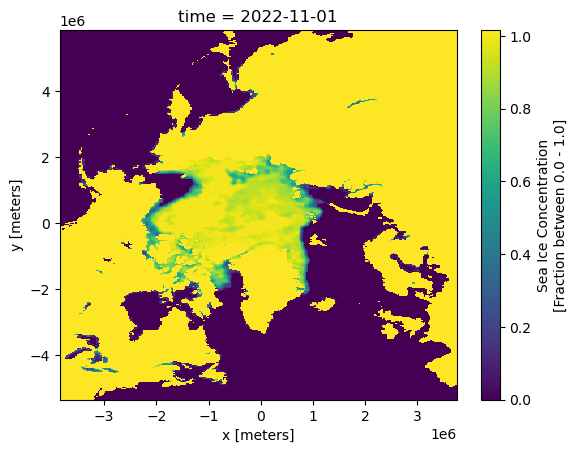

In [29]:
# select just coastal areas (should this be in preprocessing?)

ds.isel(time=0).F17_ICECON.plot()